# 1. Preparation

In [ ]:
# Import module
import keras
keras.__version__

'2.12.0'

# 2. Load Dataset

In [ ]:
# Import modules
from keras.datasets import reuters

In [ ]:
# Load Dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)  # Limit words to 10,000

In [ ]:
# Check a shape
print('Train Data: ', train_data.shape)
print('Test Data: ', test_data.shape)
print('Train Labels: ', train_labels.shape)
print('Test Labels: ', test_labels.shape)

Train Data:  (8982,)
Test Data:  (2246,)
Train Labels:  (8982,)
Test Labels:  (2246,)


# 3. Prepare Data

## 3.1. Vectorize Data

In [ ]:
# Import modules
import numpy as np

# Define Vectorized Sequences
def vectorize_sequences(sequences, dimension=10000):
  
  # Make an array filled with '0'
  results = np.zeros((len(sequences), dimension))

  # If the word is matched to the 10000 words, then return '1' as a result
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1

  return results

In [ ]:
# Vectorize Train and Test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

## 3.2. Encoding

In [ ]:
# Import modules
from keras.utils.np_utils import to_categorical

In [ ]:
# Encoding -> 'Y' value
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# 4. Create a Neural Network

In [ ]:
# Import modules
from keras import models
from keras import layers

In [ ]:
# Create a model
model = models.Sequential()

# Input layer
model.add(layers.Dense(64,
                       activation='relu',
                       input_shape=(10000,)))

# Hidden layer
model.add(layers.Dense(64,
                       activation='relu'))

# Output layer
model.add(layers.Dense(46,   # 46 topics
                       activation='softmax'))  # A result belongs to a single category

In [ ]:
# Compile
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Devide Data into Three Parts

In [ ]:
# Validation Data

x_val = x_train[:1000]  # Reason: The total number of data is only 8982
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# 6. Fit Data

In [ ]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# Result
#  - Accuracy of Training: loss, accuracy
#  - Accuracy of Validation: val_loss, val_accuracy

Epoch 1/20
16/16 [==============================] - 4s 138ms/step - loss: 2.7709 - accuracy: 0.4946 - val_loss: 1.8904 - val_accuracy: 0.6150
Epoch 2/20
16/16 [==============================] - 2s 103ms/step - loss: 1.5880 - accuracy: 0.6724 - val_loss: 1.4493 - val_accuracy: 0.6790
Epoch 3/20
16/16 [==============================] - 2s 101ms/step - loss: 1.2163 - accuracy: 0.7379 - val_loss: 1.2602 - val_accuracy: 0.7320
Epoch 4/20
16/16 [==============================] - 2s 141ms/step - loss: 0.9899 - accuracy: 0.7927 - val_loss: 1.1229 - val_accuracy: 0.7640
Epoch 5/20
16/16 [==============================] - 2s 126ms/step - loss: 0.8209 - accuracy: 0.8262 - val_loss: 1.0445 - val_accuracy: 0.7720
Epoch 6/20
16/16 [==============================] - 1s 91ms/step - loss: 0.6861 - accuracy: 0.8543 - val_loss: 0.9779 - val_accuracy: 0.7930
Epoch 7/20
16/16 [==============================] - 2s 95ms/step - loss: 0.5755 - accuracy: 0.8782 - val_loss: 0.9352 - val_accuracy: 0.7990
Epoch 8/

# 7. Visualization

In [ ]:
# Import modules
import matplotlib.pyplot as plt

In [ ]:
# Define loss and accuracy
loss = history.history['loss']
val_loss = history.history['val_accuracy']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [ ]:
# Value of Epochs
epochs = range(1, len(loss)+1)

## 7.1. Loss Graphs

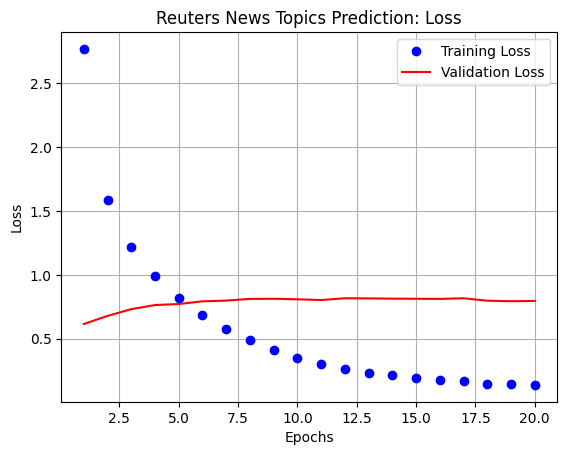

In [ ]:
# Visualization

# Training Loss
plt.plot(epochs,
         loss,
         'bo',
         label='Training Loss')

# Validation Loss
plt.plot(epochs,
         val_loss,
         'r-',
         label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Reuters News Topics Prediction: Loss')

plt.legend()
plt.grid()

## 7.2. Accuracy Graphs

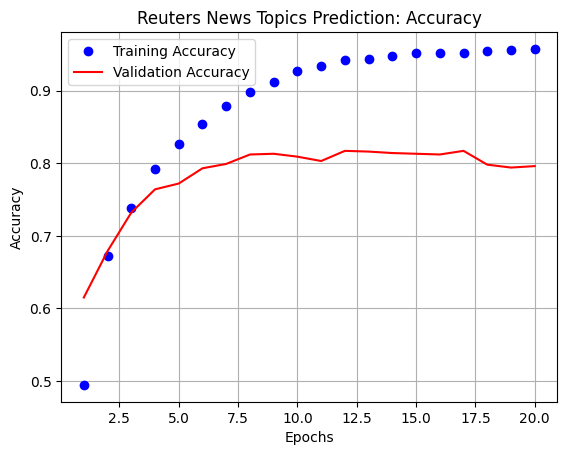

In [ ]:
# Visualization

# Training Loss
plt.plot(epochs,
         acc,
         'bo',
         label='Training Accuracy')

# Validation Loss
plt.plot(epochs,
         val_acc,
         'r-',
         label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Reuters News Topics Prediction: Accuracy')

plt.legend()
plt.grid()

# 8. Evaluation with Validated Model

In [ ]:
# Create a model
model = models.Sequential()

# Input layer
model.add(layers.Dense(64,
                       activation='relu',
                       input_shape=(10000,)))

# Hidden layer
model.add(layers.Dense(64,
                       activation='relu'))

# Output layer
model.add(layers.Dense(46,   # 46 topics
                       activation='softmax'))  # A result belongs to a single category                       

In [ ]:
# Compile
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# History
history = model.fit(partial_x_train,  # Train Data
                    partial_y_train,  # Train Data
                    epochs=11,
                    batch_size=512,
                    validation_data=(x_val, y_val))   # Validation Data

Epoch 1/11
16/16 [==============================] - 2s 68ms/step - loss: 2.8648 - accuracy: 0.4486 - val_loss: 1.9206 - val_accuracy: 0.5890
Epoch 2/11
16/16 [==============================] - 1s 57ms/step - loss: 1.6207 - accuracy: 0.6553 - val_loss: 1.4302 - val_accuracy: 0.6790
Epoch 3/11
16/16 [==============================] - 1s 87ms/step - loss: 1.2505 - accuracy: 0.7229 - val_loss: 1.2350 - val_accuracy: 0.7250
Epoch 4/11
16/16 [==============================] - 1s 81ms/step - loss: 1.0328 - accuracy: 0.7752 - val_loss: 1.1184 - val_accuracy: 0.7550
Epoch 5/11
16/16 [==============================] - 1s 50ms/step - loss: 0.8607 - accuracy: 0.8138 - val_loss: 1.0367 - val_accuracy: 0.7730
Epoch 6/11
16/16 [==============================] - 1s 48ms/step - loss: 0.7214 - accuracy: 0.8447 - val_loss: 0.9920 - val_accuracy: 0.7860
Epoch 7/11
16/16 [==============================] - 1s 49ms/step - loss: 0.6146 - accuracy: 0.8722 - val_loss: 0.9387 - val_accuracy: 0.7870
Epoch 8/11
16

In [ ]:
# Evaluation
eval_result = model.evaluate(x_test,
                             one_hot_test_labels)     # Test Data

print(eval_result)

# Result
# - Loss: 1.0564
# - Accuracy: 0.7853

71/71 [==============================] - 0s 3ms/step - loss: 0.9400 - accuracy: 0.7850
[0.9400326013565063, 0.7849510312080383]
